# **Name: Sajeel Tariq<br>RollNo: CTAI-29**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df.isna()

,number_courses,time_study,Marks
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.isna().sum()

,0
number_courses,0
time_study,0
Marks,0


In [4]:
X = df[['Distance_km', 'Preparation_Time_min']].values
y = df['Delivery_Time_min'].values.reshape(-1, 1)

In [5]:
X

array([[ 7.93, 12.  ],
       [16.42, 20.  ],
       [ 9.52, 28.  ],
       ...,
       [15.62, 26.  ],
       [14.17,  8.  ],
       [ 6.63, 24.  ]])

In [6]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [7]:
X

array([[-0.37408542, -0.69185319],
       [ 1.11700846,  0.41911139],
       [-0.09483462,  1.53007597],
       ...,
       [ 0.97650491,  1.25233482],
       [ 0.72184224, -1.24733548],
       [-0.60240368,  0.97459368]])

In [8]:
# Add bias term (column of ones)
m = len(y)  # Number of training examples
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 for theta_0 (bias term)

In [9]:
# Initialize parameters (theta values)
theta = np.zeros((3, 1))  # [theta_0, theta_1, theta_2]
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations

In [10]:
theta

array([[0.],
       [0.],
       [0.]])

#  Cost Function (Mean Squared Error)

In [11]:

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

#  Gradient Descent Algorithm





In [12]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []  # Store cost values for plotting

    for epoch in range(epochs):
        predictions = X.dot(theta)  # Compute hypothesis
        errors = predictions - y  # Compute errors
        gradients = (1 / m) * X.T.dot(errors)  # Compute gradients
        theta -= alpha * gradients  # Update theta

        cost = compute_cost(X, y, theta)  # Compute cost after update
        cost_history.append(cost)  # Store cost

        # Print cost every 100 iterations
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history

In [13]:

theta_optimal, cost_history = gradient_descent(X_b, y, theta, alpha, epochs)




Epoch 0: Cost = 1817.1437736417768
Epoch 100: Cost = 305.1054689670287
Epoch 200: Cost = 102.27501575209077
Epoch 300: Cost = 75.06573833755054
Epoch 400: Cost = 71.41555678798889
Epoch 500: Cost = 70.92586179385184
Epoch 600: Cost = 70.86016400689329
Epoch 700: Cost = 70.85134966623089
Epoch 800: Cost = 70.85016705206304
Epoch 900: Cost = 70.85000837629022


In [14]:
print("Optimized Theta Values:", theta_optimal.flatten())

Optimized Theta Values: [56.72955081 17.29063234  6.9359901 ]


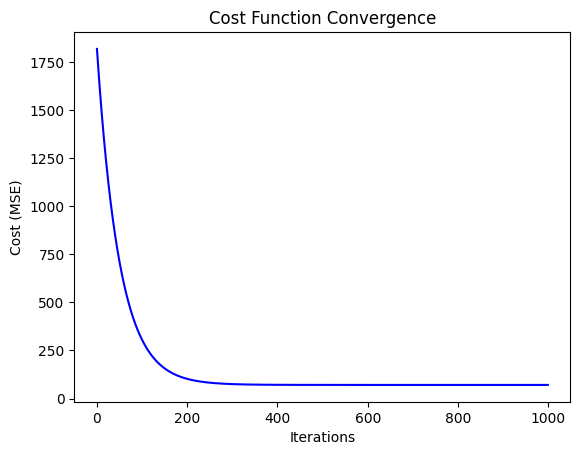

In [15]:
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()